### Описание проекта: 
Нам необходимо провести анализ оттока клиентов.  
Анализ покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка. Проанализируем клиентов регионального банка и сегментируем пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.   
Основыне шаги: Знакомство с данными и предобработка >> Исследовательский анализ данных >> Сегментация пользователей на основе данных о количестве потребляемых продуктов >> Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

### **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## 1. Знакомство с данными

### 1.1 Импорт нужных библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/Users/nonadoinjashvili/Desktop/final_project/bank_scrooge.csv')

### 1.2 Вывод данных и информации о них

In [3]:
df.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [4]:
df.info

<bound method DataFrame.info of       USERID  score       city gender  age  equity     balance  products  \
0     183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1     146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2     120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3     225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4     157978  730.0  Ярославль      М   34       5      174.00         1   
...      ...    ...        ...    ...  ...     ...         ...       ...   
9995  120553  814.0    Рыбинск      М   27       1    78144.65         1   
9996  139170  894.0  Ярославль      М   46       0         NaN         1   
9997  115639  903.0  Ярославль      М   24       0         NaN         2   
9998  148700  777.0  Ярославль      Ж   68       3   865457.97         3   
9999   96267  828.0    Рыбинск      Ж   58       3  1180886.70         4   

      credit_card  last_activity  EST_SALARY  churn  
0

In [5]:
df.dtypes

USERID             int64
score            float64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
dtype: object

На первый взгляд видим следующее:  
1) Названия столбцов в разном регистре  
2) Надо заменить тип данных на числовой в балансе 

## 2. Предобработка данных 

### 2.1 Приведём столбцы к нижнему регистру и переименуем

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [7]:
df = df.rename(columns={'userid': 'user_id', 'est_salary': 'salary','products': 'count_products'})
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'count_products', 'credit_card', 'last_activity', 'salary', 'churn'],
      dtype='object')

Заменили названия для удобной работы.

### 2.2 Проверка на наличие пропусков и их обработка

In [8]:
df.isna().sum()

user_id              0
score                0
city                 0
gender               0
age                  0
equity               0
balance           2295
count_products       0
credit_card          0
last_activity        0
salary               0
churn                0
dtype: int64

Пропуски в балансе лучше не трогать, во избежании искажения дальнейших исследований.  
Возможно, что частично - это пропуски в местах с нулевым балансом, а частично данные не обладают полнотой в связи с человеческим фактором.

In [9]:
df[df['balance'].isnull()].head(5)

,user_id,score,city,gender,age,equity,balance,count_products,credit_card,last_activity,salary,churn
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0


In [10]:
null_gender = df[df['balance'].isnull()]\
.groupby('gender')\
.agg({'user_id':'count'})\
.reset_index()

null_gender

,gender,user_id
0,Ж,1012
1,М,1283


In [11]:
print('Доля женщин с пропусками в балансе =', round(null_gender['user_id'][0] / null_gender['user_id'].sum(),2))
print('Доля мужчин с пропусками в балансе =', round(null_gender['user_id'][1] / null_gender['user_id'].sum(),2))

Доля женщин с пропусками в балансе = 0.44
Доля мужчин с пропусками в балансе = 0.56


Мужчин с пропусками больше, чем женщин, но аномальной такую разницу назвать сложно.

In [12]:
null_city = df[df['balance'].isnull()]\
.groupby('city')\
.agg({'user_id':'count'})\
.reset_index()

null_city

,city,user_id
0,Ростов,239
1,Рыбинск,578
2,Ярославль,1478


Не пооружённым взглядом видно, что большинство пропусков в Ярославле.  
Возможно именно у этого территориального банка произошёл какой-то сбой в системе и были предоставлены не полные данные.

In [13]:
null_city = df[df['balance'].isnull()]\
.groupby(['churn'])\
.agg({'user_id':'count'})\
.reset_index()

null_city

,churn,user_id
0,0,2282
1,1,13


Судя по тому, что подавляющее большинство пропусков у действующих клиентов, можем предположить, что их формируют нулевые балансы клиентов.

In [14]:
null_prod = df[df['balance'].isnull()]\
.groupby(['count_products'])\
.agg({'user_id':'count'})\
.reset_index()

null_prod

,count_products,user_id
0,0,1
1,1,1950
2,2,315
3,3,29


Большое количество пропусков у клиентов с одним продуктом косвенно подтверждает гипотезу о нулевом балансе. Клиент мог воспользоваться продуктом без его пополнения.

### 2.3 Проверка на дубликаты и их отработка

In [15]:
df.duplicated().sum()

1

In [16]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Удалили один найденный дубликат.

### 2.4 Заменим тип данных для значения баланса на числовой

In [17]:
df['balance'] = df['balance'].astype('float')
df['balance'].dtypes

dtype('float64')

Привели к нужному формату.

### 2.5 Создадим категории по возрасту

In [18]:
def age_cat(age):
    if age >= 18 and age <= 29:
        return '18-29'
    if age >= 30 and age <= 36:
        return '30-36'
    if age >= 37 and age <= 45:
        return '37-45'
    if age >= 46 and age <= 55:
        return '46-55'
    if age >= 56 and age <= 65:
        return '56-65'
    if age > 65:
        return '>65'

df['age_category'] = df['age'].apply(age_cat)

In [19]:
df.head(3)

,user_id,score,city,gender,age,equity,balance,count_products,credit_card,last_activity,salary,churn,age_category
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,18-29
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,37-45
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,30-36


Вывод:  
Подготовили данные к работе. Пропуски решаем оставить во избежании искажения данных.

## 3. Исследовательский анализ данных

### 3.1 посмотрим на количество пользователей и отток по признакам.

In [20]:
df.groupby(['city','gender'])\
.agg({'user_id':'count', 'churn':'mean'})\
.sort_values(by='user_id', ascending=False)

user_id     churn
city      gender                   
Ярославль М          3014  0.235567
          Ж          2891  0.142165
Рыбинск   Ж          1357  0.099484
          М          1306  0.227412
Ростов    Ж           744  0.123656
          М           687  0.257642

После разбивки в разрезе городов и по гендернему признаку, стало понятно сдедующее:  
1) Мужчины примерно в 2 раза чаще уходят в отток, чем женщины  
2) Соотношение по количеству между полами сопоставимое  
3) В Ярославле большая часть клиентов

In [21]:
df.groupby('credit_card')\
.agg({'user_id':'count', 'churn':'mean'})\
.sort_values(by='user_id', ascending=False)

,user_id,churn
credit_card,,
1,6803,0.147435
0,3196,0.256258


Клиенты с кредитной картой почти в 2 раза реже уходят в отток. Скорее всего такой продукт действует как привязка к банку для постоянного гашения задолженности.

In [22]:
df.groupby('equity')\
.agg({'user_id':'count', 'churn':'mean'})\
.sort_values(by='user_id', ascending=False)

,user_id,churn
equity,,
0,2591,0.034736
5,1918,0.300834
4,1850,0.251351
3,1543,0.209332
2,1052,0.157795
1,774,0.120155
6,161,0.360248
7,80,0.462500
8,17,0.352941


Прослеживается тенденция к оттоку с увеличением объектов собственности. Видимо необходиость пользоваться продуктами банка, часто отпадает у тех, кто уже обзавёлся квартирами, машинами и т.д.

In [23]:
df.groupby('count_products')\
.agg({'user_id':'count', 'churn':'mean'})\
.sort_values(by='user_id', ascending=False)

,user_id,churn
count_products,,
2,5108,0.191660
1,3340,0.070359
3,1046,0.284895
4,474,0.632911
5,30,0.300000
0,1,1.000000


Чем больше продуктов - тем чаще клиенты уходят в отток.

In [24]:
def plots(data, hue):
    for column in ['city','gender', 'credit_card', 'equity', 'count_products']:
        sns.countplot(data=data, x=column, hue=hue, order=df[column].value_counts().index)
        sns.set(rc={'figure.figsize':(10,5)})
        plt.title(f'Распределение по {column}', fontsize = 10)
        plt.show()

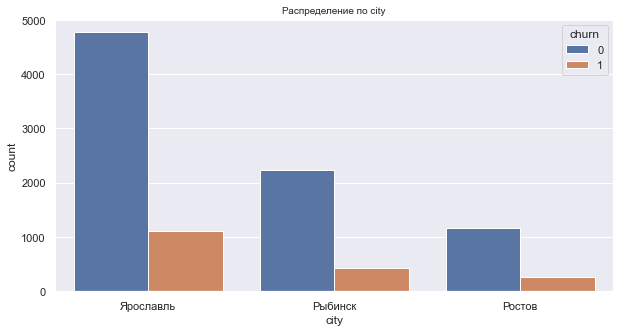

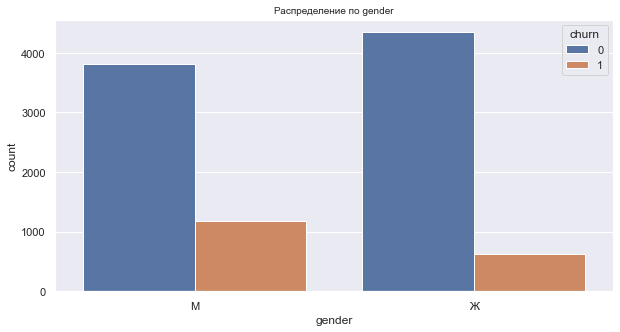

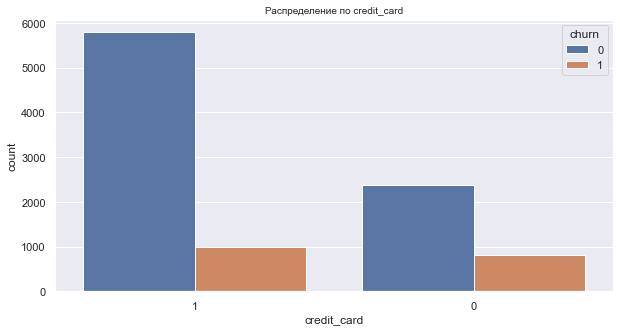

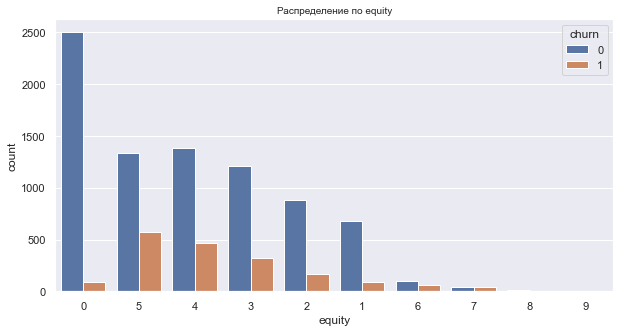

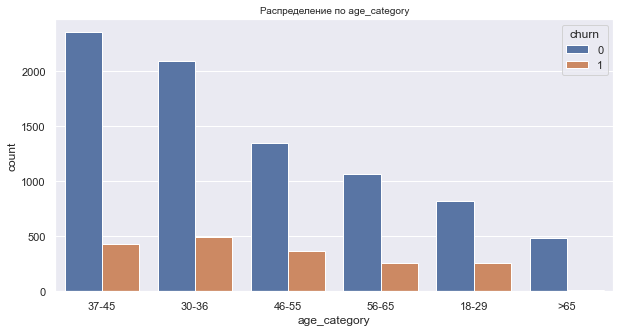

In [42]:
plots(df, df['churn'])

Выводы:  
- чем больше продуктов - тем чаще клиенты уходят в отток  
- прослеживается тенденция к оттоку с увеличением объектов собственности  
- мужчины примерно в 2 раза чаще уходят в отток, чем женщины  
- соотношение по количеству клиентов между полами сопоставимое 

### 3.2 Оценим остатки на балансе для действующих и бывших клиентов.

In [26]:
gender_df = df.groupby(['churn'])\
.agg({'balance':'sum'})\
.reset_index()
total = gender_df['balance'].sum()

print('Доля баланса действующих клиентов:', round(gender_df['balance'][0] / total, 2))
print('Доля баланса ушедших клиентов:', round(gender_df['balance'][1] / total, 2))

Доля баланса действующих клиентов: 0.68
Доля баланса ушедших клиентов: 0.32


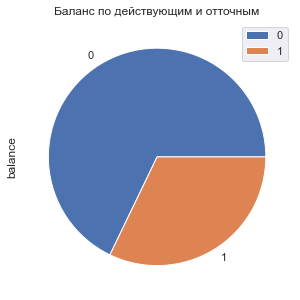

In [27]:
fig1 = df.groupby('churn')\
.agg({'balance':'sum'})\
.plot(kind='pie', subplots=True)
plt.title('Баланс по действующим и отточным')

plt.show()

Остатки на счетах действующих клиентов превышают более, чем в 2 раза.

### 3.3 Обратим внимание на средний возраст клиентов, которые сформировали отток.

In [28]:
df.pivot_table(index='gender', values='age', aggfunc='mean')

,age
gender,
Ж,45.571114
М,40.113241


От 40 до 46 лет наибольшее количество покинувших банк.

### 3.4 Построим матрицу корреляции показателей.

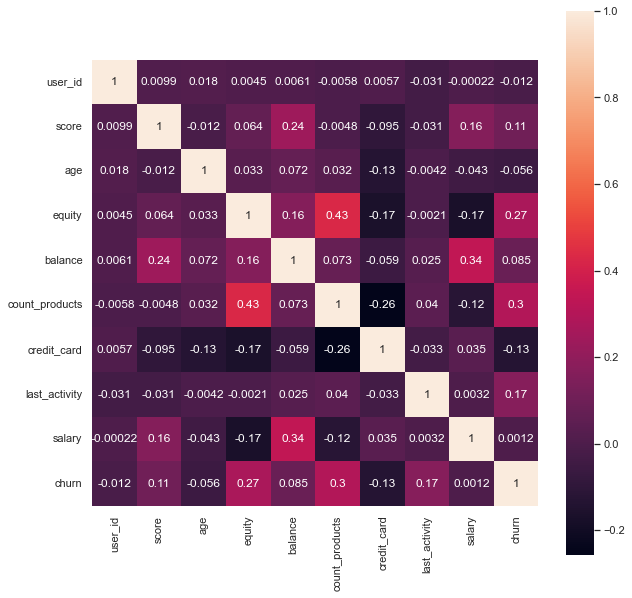

In [29]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, square=True)

plt.show()

Сильная корреляция между:  
- Кредитными картами и количеством продуктов  
- Колисетвом предметов залога и количеством продуктов  
- Зарплатой и балансом  
- Предметами залога и оттоком

Выводы:  
- чем больше продуктов - тем чаще клиенты уходят в отток  
- прослеживается тенденция к оттоку с увеличением объектов собственности  
- мужчины примерно в 2 раза чаще уходят в отток, чем женщины  
- соотношение по количеству клиентов между полами сопоставимое 
- максимальная корреляция между показателями всего 0.43 между количеством продуктов и предметов собственности.  
- отток формируют в основном люди средних лет от 40 до 46 лет и чаще мужчины.

## 4. Сегментация клиентов

### 4.1 Узнаем долю  клиентов в разбивке по количеству продуктов 

In [30]:
df['count_products'].unique()

array([2, 3, 1, 4, 5, 0])

In [31]:
df.groupby('count_products')\
.agg({'user_id':'nunique'})

,user_id
count_products,
0,1
1,3327
2,5096
3,1046
4,474
5,30


Исключим из дальнейшего анализа клиента с 0 и 5 продуктами. Можем считать выбросом 31 клиента из 10 000.

In [32]:
df = df.query('count_products != 0 & count_products != 5')
df['count_products'].unique()

array([2, 3, 1, 4])

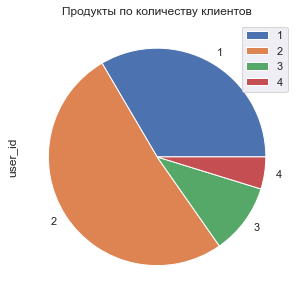

In [33]:
fig1 = df.groupby('count_products')\
.agg({'user_id':'nunique'})\
.plot(kind='pie', subplots=True)
plt.title('Продукты по количеству клиентов')

plt.show()

Большинство клиентом пользуется 2-мя продуктами банка и совсем немногие обзавелись 4-мя.

### 4.2 Посмотрим на количество пользователей по продуктам с учётом признаков

In [34]:
def plots(data, hue):
    for column in ['city','gender', 'credit_card', 'equity', 'age_category']:
        sns.countplot(data=data, x=column, hue=hue, order=df[column].value_counts().index)
        sns.set(rc={'figure.figsize':(10,5)})
        plt.title(f'Распределение по {column}', fontsize = 10)
        plt.show()

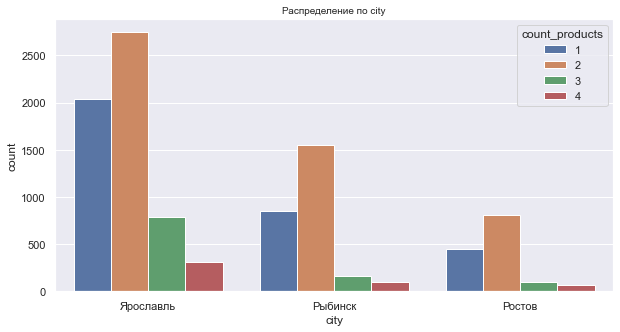

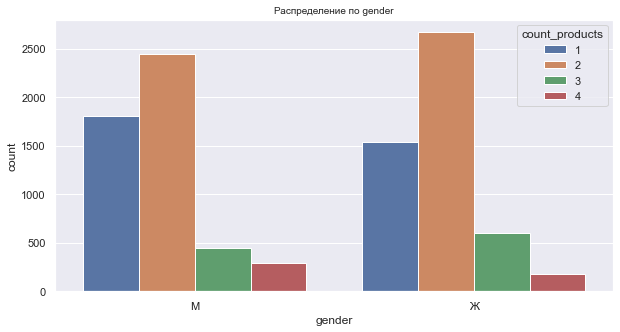

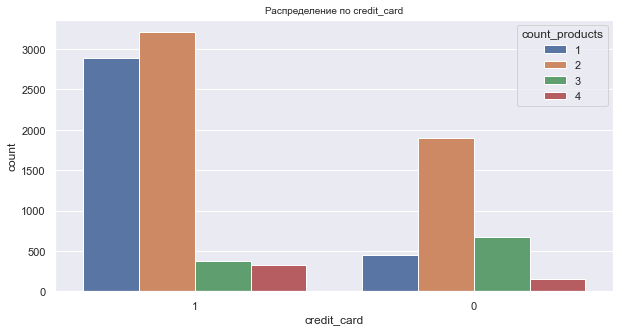

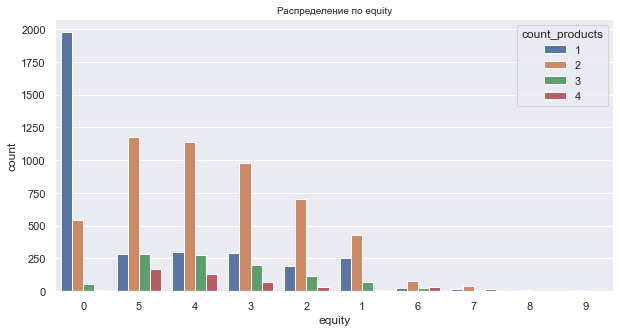

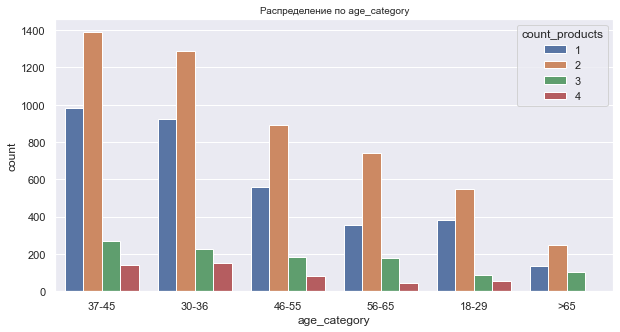

In [35]:
plots(df, df['count_products'])

### 4.3 Разделим пользователей по сегментам

Разделим пользователей по сегментам в зависимости от количества продуктов.   

In [36]:
df.groupby(['count_products','gender'])\
.agg({'user_id':'count', 'churn':'mean'})\
.sort_values(by='user_id', ascending=False)

user_id     churn
count_products gender                   
2              Ж          2666  0.128282
               М          2442  0.260852
1              М          1807  0.094632
               Ж          1533  0.041748
3              Ж           599  0.212020
               М           447  0.382550
4              М           296  0.675676
               Ж           178  0.561798

In [37]:
df.pivot_table(index='age_category', columns='count_products', values='user_id', aggfunc='count')

count_products,1,2,3,4
age_category,,,,
18-29,382,546,89,57
30-36,925,1289,226,151
37-45,981,1388,268,139
46-55,558,893,181,83
56-65,356,742,180,43
>65,138,250,102,1


In [38]:
def boxplots():
    for column in ['age', 'equity', 'score', 'salary']:
        sns.boxplot(x = 'count_products', y = df[column], data = df).set(
        title=(f'Распределение {column} по продуктам'))
        plt.show()

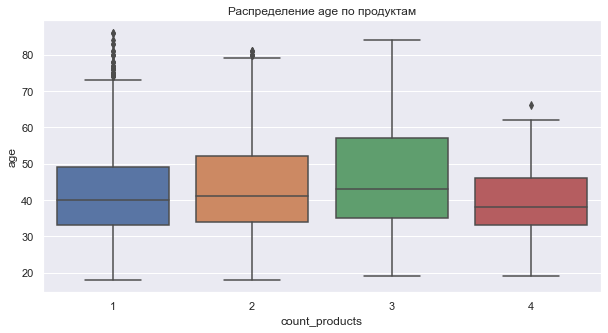

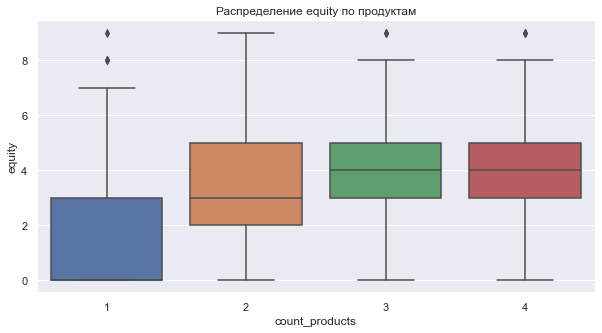

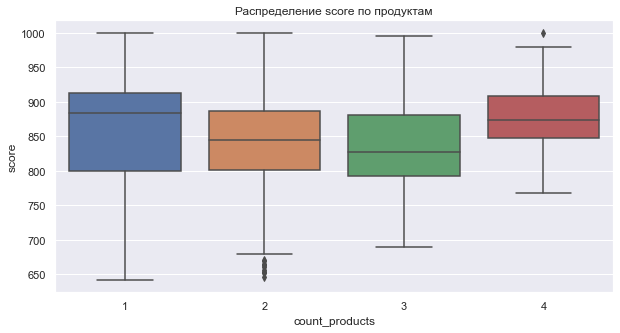

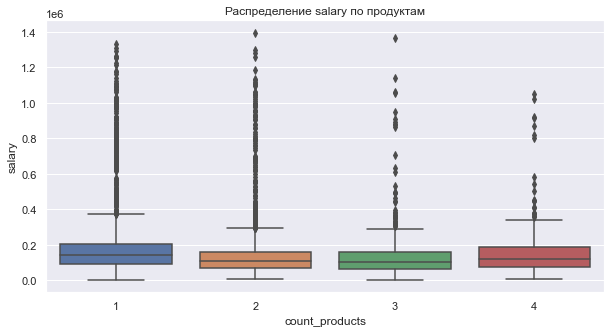

In [39]:
boxplots()

Можем увидеть, что в 3-ю категорию попадают более возрастные клиенты. Однако в 1-ой наибольшее количество выбросов. Возможно - это связано с тем, что пенсионеры редко используют что либо кроме обычной карты. Ожидаемо наибольшие медианные значения среди клиентов с 3 и 4 продуктами. Именно этим клиентам банк больше доверяет, так как у них есть достаточное залоговое обеспечение.

Описание сегментов:  
- сегмент 1. Чаще мужчина, чем женщина, среднего возраста (от 37 до 45). Характеризуется достаточно высоким уровнем медианной зарплаты и хорошим скоринговым баллом. Так же по этому сегменту наименьший показатель объектов в собственности. Такие клиенты для банка высокопотенциальные и ещё многим не успели воспользоваться.  
- сегмент 2. Чаще женщина, чем мужчина, среднего возраста (от 37 до 45). Эта группа самая многочисленная и занимает 2-ое место по соотношению клиентов, ушедших в отток, после 1-ой группы. Медианная зарпалата на уровне со 3-ей и 4-ой группы и ниже 1-ой, но с больших количеством аномально больших значений. Клиенты данной категории уже обзавелись объектами собственности, можно предположить, что за счёт приобретений на кредитные средства банка.  
- сегмент 3. Женщин  более, чем на 20% больше чем мужчин. Уровень среднего скорингового балла ниже, чем в предыдущих двух группах. Есть негативная тенденция к большему оттоку пользователей. Однако положительная динамика прослеживается в количестве объектов недвижимости данной группы. Возможно, что клиенты этого сегмента воспользовались не одним кредитным продуктом банка.  
- сегмент 4. Большинство данного сегмента уходят в отток. Совсем небольшое количество клиентов без кредитной карты и в целом складывается ощущение, что перепробовали почти все продукты перед оттоком. С другой стороны, большинство попадает в возрастную категорию помладше предыдущих (30-36 лет). И есть существенный перекос в сторону мужчин по количеству клиентов, а это совпадает с общей тенденцией - мужчины гораздо чаще уходят в отток, чем женщины.

## 5. Статистические гипотезы

### 5.1 Определим стат. критерий. Сформируем нулевую и альтернативную гипотезу №1

Уровень статистической сзначимости установим на уровне 5%.

Нулевая гипотеза: средняя зарплата клиентов с одним и двумя продуктами одинаковая.  
Альтернативная гипотеза: средняя зарплата клиентов с одним и двумя продуктами разная.

In [40]:
alpha = .05
results = st.stats.ttest_ind(
    df[df['count_products']==2]['salary'], df[df['count_products']==1]['salary']
    )
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.4573512522390504e-57
Отвергаем нулевую гипотезу


### 5.1 Определим стат. критерий. Сформируем нулевую и альтернативную гипотезу №2

Уровень статистической сзначимости установим на уровне 5%. 

Нулевая гипотеза: среднее количество объектов собственности клиентов с мужского и женского пола одинаковое.  
Альтернативная гипотеза: среднее количество объектов собственности клиентов с мужского и женского пола разное.

In [41]:
alpha = .05
results = st.stats.ttest_ind(
    df[df['gender']=='М']['equity'], df[df['gender']=='Ж']['equity']
    )
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.02786067621769642
Отвергаем нулевую гипотезу


Вывод:  
1) количество объектов собственности клиентов с мужского и женского пола разное  
2) зарплата клиентов с одним и двумя продуктами разная

## 6. Сформулируем выводы и реккомендации в разрезе сегментов.

Сегмент №1  
По данному сегменту наилучшее соотношение оставшихся клиентов. Данный сегмент характеризуется высоким скоринговым рейтингом - свыше 850 баллов и большим разбросом по возрасту. Будем ориентироваться на показатели данного сегмента, как предпочтительного для банка. Мужчин больше, чем женщин. Возраст от 37 до 45. Характеризуется достаточно высоким уровнем медианной зарплаты. Так же по этому сегменту наименьший показатель объектов в собственности. Такие клиенты для банка высокопотенциальные и ещё многим не успели воспользоваться.
Сегмент №2  
Этот сегмент самый многочисленный по числу клиентов - 5096 из всей выборки. Он так же занимает 2-ое место по соотношению оставшихся клиентов. Возраста чаще встречаются от 37 до 45. Медианная зарплата на среднем уровне относительно других сегментов. Есть положительная динамика в увеличении объектов собственности.   
Сегмент №3  
Значительно меньшее число клиентов имеют 3 продукта. В среднем показатели скорингового балла у данной категории ниже, чем у других. Возможно среди таких клиентов есть те, кто довольно сильно награжал себя кредитными продуктами и допускал просрочку. Уровень средних зарплат по сегменту низкий.  
Сегмент №4    
Среди этих клиентов отточных больше, чем оставшихся. Очевидно, человеку уже почти нечем воспользоваться и он уходит в отток. Высокий скоринговый балл коррелируется с высоким доходом и скорее всего у таких клиентов уже есть выплаченные кредиты в банке. Так же, прослеживается. Совсем небольшое количество клиентов без кредитной карты и в целом складывается ощущение, что перепробовали почти все продукты перед оттоком. С другой стороны, большинство попадает в возрастную категорию ниже предыдущих сегментов -  30-36 лет. И есть существенный перекос в сторону мужчин по количеству клиентов, а это совпадает с общей тенденцией - мужчины гораздо чаще уходят в отток, чем женщины.

Основные реккомендации по итогам анализа:  
1) Обратить внимание на мужской контингент и возможно провести маркетинговый акции, нацеленные именно  на их удержание.  
2) Обращать внимание на клиентов с 3 и 4 продуктами. Их стоит реанимировать, предложив льготы по уже действующим продуктам.  
3) Вполне возможно использование потенциала привлечения более возрастных клиентов от 45 лет и выше. Их значительно меньше на общем фоне.

Ссылка на дашборд:  
https://public.tableau.com/app/profile/egor7452/viz/users_16781341687490/Dashboard1  